In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

# TO DO's
* link the data to the db that reloads
* find the answers dataset and link as well
* make analsys of what are the best letters to start with (compared to answers)

In [4]:
tweets = pd.read_csv('/Users/amos/downloads/tweets-3.csv')
tweets

wordle_id             tweet_id                 tweet_date  \
0             210  1482553374591660037  2022-01-16 03:20:43+00:00   
1             210  1482553387937898499  2022-01-16 03:20:46+00:00   
2             210  1482553422276698113  2022-01-16 03:20:55+00:00   
3             210  1482553436910628866  2022-01-16 03:20:58+00:00   
4             210  1482553445726908420  2022-01-16 03:21:00+00:00   
...           ...                  ...                        ...   
549550        328  1525292003700920321  2022-05-14 01:48:46+00:00   
549551        328  1525292026094399488  2022-05-14 01:48:52+00:00   
549552        328  1525292031400038400  2022-05-14 01:48:53+00:00   
549553        328  1525292034801664001  2022-05-14 01:48:54+00:00   
549554        328  1525292082184609792  2022-05-14 01:49:05+00:00   

        tweet_username                                         tweet_text  
0             bpszebes       Wordle 210 4/6\n\nâ¬›â¬›ðŸŸ¨ðŸŸ¨â¬›\nðŸŸ©â¬›â¬›â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ¨â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©  
1           cruisecoup       Wordle 210 4/6\n\nâ¬œâ¬œâ¬œâ¬œâ¬œ\nðŸŸ©ðŸŸ©ðŸŸ¨ðŸŸ¨â¬œ\nðŸŸ©ðŸŸ©â¬œðŸŸ©ðŸŸ¨\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©  
2           DestroVega       Wordle 210 4/6\n\nâ¬œâ¬œâ¬œðŸŸ¨â¬œ\nâ¬œðŸŸ©â¬œðŸŸ¨â¬œ\nâ¬œðŸŸ©â¬œðŸŸ¨â¬œ\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©  
3          brenmardash              Wordle 210 3/6\n\nâ¬œâ¬œðŸŸ¨â¬œâ¬œ\nðŸŸ¨ðŸŸ¨â¬œâ¬œâ¬œ\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©  
4          KatieHowse2              Wordle 210 3/6\n\nâ¬›â¬›ðŸŸ¨â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ©â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©  
...                ...                                                ...  
549550  DLomasWilliams       Wordle 328 4/6\n\nðŸŸ¨ðŸŸ¨â¬›â¬›â¬›\nâ¬›â¬›â¬›ðŸŸ©ðŸŸ¨\nðŸŸ©â¬›â¬›ðŸŸ©â¬›\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©  
549551    matthewisles  Wordle 328 5/6\n\nðŸŸ¨â¬›â¬›â¬›â¬›\nâ¬›ðŸŸ©â¬›ðŸŸ¨ðŸŸ©\nâ¬›â¬›â¬›â¬›â¬›\nâ¬›â¬›â¬›â¬›ðŸŸ¨\n...  
549552   cw4emeryville  Wordle 328 3/6\n\nðŸŸ¨â¬›â¬›â¬›ðŸŸ©\nâ¬›â¬›â¬›ðŸŸ¨ðŸŸ¨\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©\nLOOK AT...  
549553       lisa_mets       Wordle 328 4/6\n\nâ¬›â¬›â¬›â¬›ðŸŸ¨\nðŸŸ¨ðŸŸ¨â¬›â¬›ðŸŸ¨\nðŸŸ¨â¬›ðŸŸ¨ðŸŸ¨ðŸŸ©\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©  
549554    setsudanclub  Wordle 328 6/6\n\nâ¬œâ¬œðŸŸ¨â¬œâ¬œ\nâ¬œâ¬œâ¬œâ¬œðŸŸ¨\nðŸŸ¨ðŸŸ©â¬œðŸŸ¨ðŸŸ©\nâ¬œðŸŸ©ðŸŸ¨ðŸŸ¨ðŸŸ©\n...  

[549555 rows x 5 columns]

In [5]:
def process_tweets(tweets):
    tweets['tweet_datetime'] = pd.to_datetime(tweets['tweet_date'])
    tweets['tweet_date'] = tweets['tweet_datetime'].dt.date
    tweets['wordle_id'] = tweets['tweet_text'].str[:10]
    tweets['n_attempts'] = tweets['tweet_text'].str[11].astype('int')
    tweets['id'] = tweets['tweet_text'].str[7:10].astype('int')
    return tweets

tweets = process_tweets(tweets)

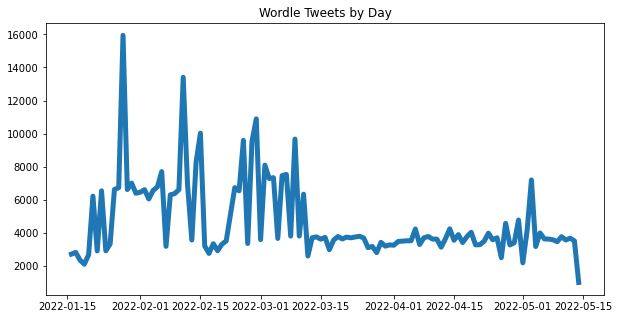

In [6]:
tweets['tweet_date'].value_counts() \
    .plot(figsize=(10, 5), title='Wordle Tweets by Day', lw=5)
plt.show()

In [7]:
tweets.groupby('wordle_id')['n_attempts'].value_counts().unstack().style.background_gradient(axis=1)

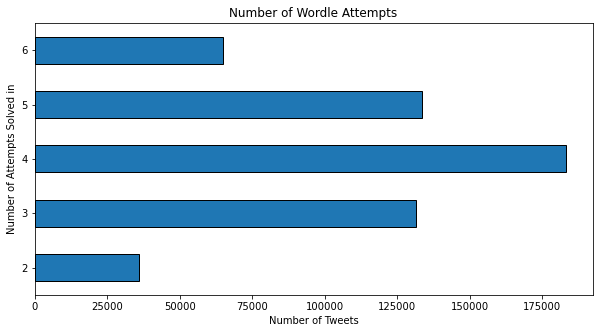

In [8]:
ax = tweets['n_attempts'].value_counts() \
    .sort_index() \
    .plot(figsize=(10, 5),
          kind='barh',
          title='Number of Wordle Attempts',
          edgecolor='black')
ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Number of Attempts Solved in')
plt.show()

In [9]:
# Make dark squares consistent
tweets['tweet_text'] = tweets['tweet_text'].str.replace('â¬œ','â¬›')

In [10]:
def parse_tweet_text(tweets):
    for n in range(6):
        n += 1
        tweets[f'has_guess{n}'] = tweets['tweet_text'].str.split('\n').str[n+1] \
            .str.contains('|'.join(['ðŸŸ¨','â¬›','ðŸŸ©'])) \
            .fillna(False)

        # Parse out the tweet text
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
                tweets['tweet_text'].str.split('\n').str[n + 1].str[:5]
        # Count number correct, misplaced, and incorrect
        tweets.loc[tweets[f'has_guess{n}'],
                       f'guess{n}_incorrect'] = tweets[f'guess{n}'].str.count('â¬›')
        tweets.loc[tweets[f'has_guess{n}'],
                   f'guess{n}_wrong_spot'] = tweets[f'guess{n}'].str.count('ðŸŸ¨')
        tweets.loc[tweets[f'has_guess{n}'],
                   f'guess{n}_correct'] = tweets[f'guess{n}'].str.count('ðŸŸ©')

        tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return tweets

tweets = parse_tweet_text(tweets)

In [11]:
# Keep additional tweet text
tweets['additional_text'] = \
    tweets.loc[~tweets['tweet_text'] \
    .str.split('\n').str[-1].str.contains('ðŸŸ©')] \
    ['tweet_text'].str.split('\n').str[-1]

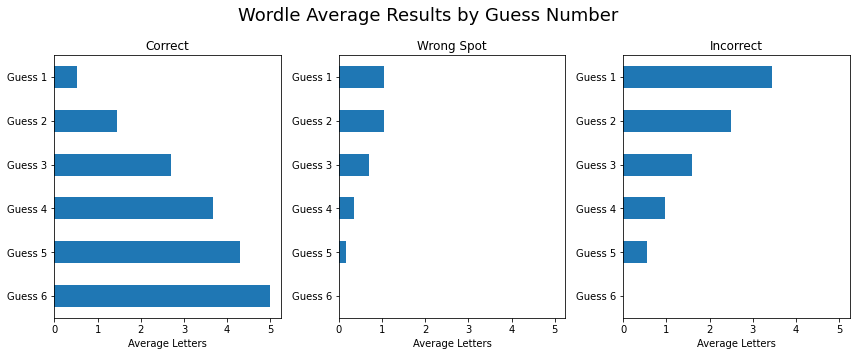

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True)

for i, x in enumerate(['_correct','_wrong_spot','_incorrect']):
    col_subset = [c for c in tweets.columns if x in c]
    guess_avg = tweets[col_subset].mean()
    guess_avg.index = [f'Guess {i+1}' for i in range(6)]
    guess_avg.sort_index(ascending=False) \
        .plot(kind='barh',
              title=f'{x.strip("_").replace("_"," ").title()}',
              ax=axs[i])
    axs[i].set_xlabel('Average Letters')
fig.suptitle('Wordle Average Results by Guess Number', fontsize=18)
plt.tight_layout()
plt.show()

In [13]:
answers = pd.read_html('https://wordfinder.yourdictionary.com/wordle/answers/')
answers = pd.concat(answers).drop(columns='Date')
# answers['Wordle #'] = 'Wordle ' + answers['Wordle #'].astype(str)

answers.head(2)

Wordle # Answer
0       439  FUNGI
0       438  PRIZE

In [14]:
tweets1 = tweets.join(answers.set_index('Wordle #'), on='id')

In [15]:
first_guess_correct = []
for i, d in tweets1.dropna(subset=['Answer']).iterrows():
    example_text = d['guess1']
    example_solution = d['Answer']
    results =[x.span()[0] for x in re.finditer('ðŸŸ©', example_text)]
    first_guess_letters = [example_solution[i] for i in results]
    first_guess_correct += first_guess_letters

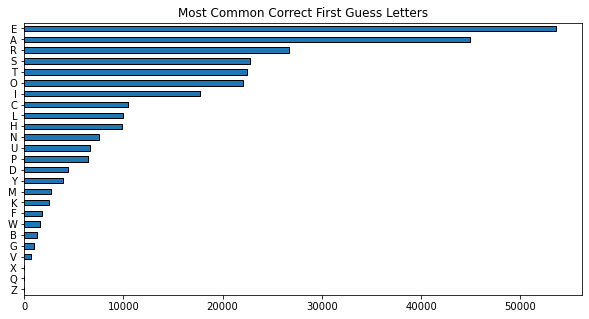

In [16]:
pd.Series(first_guess_correct).value_counts(ascending=True) \
    .plot(kind='barh', figsize=(10, 5),
         title='Most Common Correct First Guess Letters',
         edgecolor='black')
plt.show()

In [17]:
tweets1.groupby('Answer')['n_attempts'].value_counts().unstack().style.background_gradient(axis=1)

<AxesSubplot:title={'center':'Number of Attempts'}>

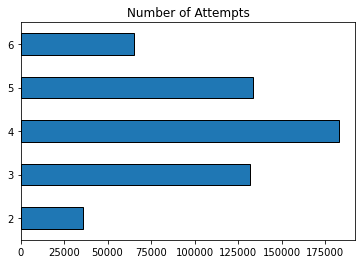

In [19]:
tweets1['n_attempts'].value_counts() \
    .sort_index().plot(kind='barh',
                       title='Number of Attempts',
                       edgecolor='black')

In [21]:
tweets1.head()

wordle_id             tweet_id  tweet_date tweet_username  \
0  Wordle 210  1482553374591660037  2022-01-16       bpszebes   
1  Wordle 210  1482553387937898499  2022-01-16     cruisecoup   
2  Wordle 210  1482553422276698113  2022-01-16     DestroVega   
3  Wordle 210  1482553436910628866  2022-01-16    brenmardash   
4  Wordle 210  1482553445726908420  2022-01-16    KatieHowse2   

                                     tweet_text            tweet_datetime  \
0  Wordle 210 4/6\n\nâ¬›â¬›ðŸŸ¨ðŸŸ¨â¬›\nðŸŸ©â¬›â¬›â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ¨â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ© 2022-01-16 03:20:43+00:00   
1  Wordle 210 4/6\n\nâ¬›â¬›â¬›â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ¨ðŸŸ¨â¬›\nðŸŸ©ðŸŸ©â¬›ðŸŸ©ðŸŸ¨\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ© 2022-01-16 03:20:46+00:00   
2  Wordle 210 4/6\n\nâ¬›â¬›â¬›ðŸŸ¨â¬›\nâ¬›ðŸŸ©â¬›ðŸŸ¨â¬›\nâ¬›ðŸŸ©â¬›ðŸŸ¨â¬›\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ© 2022-01-16 03:20:55+00:00   
3         Wordle 210 3/6\n\nâ¬›â¬›ðŸŸ¨â¬›â¬›\nðŸŸ¨ðŸŸ¨â¬›â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ© 2022-01-16 03:20:58+00:00   
4         Wordle 210 3/6\n\nâ¬›â¬›ðŸŸ¨â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ©â¬›â¬›\nðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ©ðŸŸ© 2022-01-16 03:21:00+00:00   

   n_attempts   id  has_guess1 guess1  ...  guess5_incorrect  \
0           4  210        True  â¬›â¬›ðŸŸ¨ðŸŸ¨â¬›  ...               NaN   
1           4  210        True  â¬›â¬›â¬›â¬›â¬›  ...               NaN   
2           4  210        True  â¬›â¬›â¬›ðŸŸ¨â¬›  ...               NaN   
3           3  210        True  â¬›â¬›ðŸŸ¨â¬›â¬›  ...               NaN   
4           3  210        True  â¬›â¬›ðŸŸ¨â¬›â¬›  ...               NaN   

   guess5_wrong_spot  guess5_correct  has_guess6  guess6 guess6_incorrect  \
0                NaN             NaN       False     NaN              NaN   
1                NaN             NaN       False     NaN              NaN   
2                NaN             NaN       False     NaN              NaN   
3                NaN             NaN       False     NaN              NaN   
4                NaN             NaN       False     NaN              NaN   

   guess6_wrong_spot  guess6_correct  additional_text  Answer  
0                NaN             NaN              NaN   PANIC  
1                NaN             NaN              NaN   PANIC  
2                NaN             NaN              NaN   PANIC  
3                NaN             NaN              NaN   PANIC  
4                NaN             NaN              NaN   PANIC  

[5 rows x 41 columns]

In [22]:
tweets1['day'] = tweets1['tweet_datetime'].dt.day_name()
tweets1['tweet_date_'] = tweets1['tweet_datetime'].dt.date

tweets1.groupby(['tweet_date_','day'])['n_attempts'].value_counts() \
    .unstack() \
    .style.background_gradient()